# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 07/15/2022
* Student Name: Humaira Halim
* Student Net ID: hbh4bv
* This URL: https://github.com/Humairabh/DS5100_FinalProject/blob/main/FinalProjectSubmissionTemplate.ipynb
* GitHub Repo URL: https://github.com/Humairabh/DS5100_FinalProject

# The Monte Carlo Module

In [94]:
import unittest
import numpy as np
import pandas as pd
import random
from random import choices
from itertools import combinations
from itertools import combinations_with_replacement
from itertools import groupby

class Die:
    """
    A class used to represent a Die. A die has N sides, or "faces", and W weights, and can be rolled to select a face. 

    ...

    Attributes
    ----------
    N : array
        an array of sides, or "faces" for the Die
    W : array
        an array of weights corresponding the the array of faces, defaults to 1.0 for each face
        
    Methods
    -------
    __init__
        Takes an array of faces as an argument. The array's data type (dtype) may be strings or numbers.
        Internally initializes the weights to 1.0 for each face.
        Saves both faces and weights into a private dataframe that is to be shared by the other methods.
    
    change_weight(self, face, new_weight) 
        A method to change the weight of a single side
        
    roll_die(self, nrolls=1)
        A method to roll the die one or more times. Defaults to 1 roll
    """
    
    def __init__(self, N, W=1.0):
        
        """
        Parameters
        ----------
        N : array
            an array of sides, or "faces" for the Die
        W : array
            an array of weights corresponding the the array of faces, 
            defaults to 1.0 for each face but can be changed after the object is created.
        """
        
        self.N = N
        self.W = np.ones(len(N))
        self._dfpriv = pd.DataFrame({'faces': self.N, 'weights': self.W})
        

    

    def change_weight(self, face, new_weight):
        
        """A method to change the weight of a single side.

            Checks to see if the face passed is valid; is it in the array of weights?
            Checks to see if the weight is valid; is it a float? Can it be converted to one?
            
            Parameters
            ----------
            face : str or int 
                the face value to be changed
            new_weight : float
                the new weight
        """
        try: 
            new_weight = float(new_weight)
        except ValueError:
            print("Oops!  That was no valid number.  Try again...")
            
        if face in self._dfpriv.faces.values:
            self._dfpriv.loc[self._dfpriv.faces == face, "weights"] = new_weight
        
        
    def roll_die(self, nrolls=1):
        
        """A method to roll the die one or more times. Returns a list of outcomes

            If the arguement "nrolls" is not passed in, defaults to 1 
            
            Parameters
            ----------
            nrolls : int, optional
                how many times the die is to be rolled (default is 1)
        """
        
        result = choices(self.N, self._dfpriv["weights"],
              k=nrolls)
        return pd.Series(result)
    
    
    
    
    
class Game:
    """
    A class used to represent a Game. A game consists of rolling of one or more dice of the same kind one or more times. 
    The class keeps the results of its most recent play. 

    ...

    Attributes
    ----------
    dice : array
        a list of already instantiated similar Die objects

        
    Methods
    -------
    __init__
        Takes a single parameter, a list of already instantiated similar Die objects.
        
    play(self, nrolls)
        Takes a parameter to specify how many times the dice should be rolled.
        Saves the result of the play to a private dataframe of shape N rolls by M dice which can be accessed with show()
        
    show(self, show='wide')
        A method to pass the private play() dataframe to the user. Defaults to a wide dataframe
    """
    def __init__(self, dice):

        """
        Parameters
        ----------
        dice : array
            an array of already instantiated similar Die objects

        """
        self.dice = dice
    
    def play(self,nrolls):

        """A method which takes a number of times to roll the dice 

            Saves the result of the play to a private dataframe of shape N rolls by M dice.
        
            Parameters
            ----------
            nrolls : int
                the number of times to roll the dice 
        """        
        
        self._playdf = pd.DataFrame({'Roll #': range(0+1, len(self.dice[0].N)+2)}).set_index('Roll #')
        #for x in range(len(self.dice)):
        #    self._playdf["Die"+str(x+1)] = self.dice[x].roll_die(nrolls+1)
        roll = [i for i in range(1,nrolls+1)]
        for i in range(0+1,nrolls):
            self._playdf = pd.DataFrame({'rollNumber':roll}).set_index('rollNumber')        
        for i in range(len(self.dice)):
            self._playdf[i]=self.dice[i].roll_die(nrolls)
    
        
    def show(self, show='wide'):

        """A method to show the user the results of the most recent play

            Passes the private dataframe to the user
        
            Parameters
            ----------
            show : 'wide' or 'narrow'
                choice to display dataframe in wide or narrow format (defaults to 'wide' form)
        """  
        
        if show=='wide':
            return self._playdf
        if show=='narrow':
            return self._playdf.unstack()

        
        
        
        
        
class Analyzer:
    """
    A class which takes the results of a single game and computes various descriptive statistical properties about it. 
    These properties results are available as attributes of an Analyzer object. 

    ...

    Attributes
    ----------
    game : game object
        an object of class Game

        
    Methods
    -------
    __init__
        Takes a game object as its input parameter. 
        At initialization time, it also infers the data type of the die faces used
        
    jackpot(self)
        A method to compute how many times the game resulted in all faces being identical
        
    combo(self, show='wide')
        A method to compute the distinct combinations of faces rolled, along with their counts
    """    
    
    def __init__(self, game):

        """
        Parameters
        ----------
        game : game object
            an object of class Game

        """
        self.game = game

    def face_count(self):

        """A method to compute how many times the game resulted in all faces being identical

            Returns an integer for the number times to the user.
            Stores the results as a dataframe of jackpot results in a public attribute .jackpotdf
        
            Parameters
            ----------
            analyzer : Analyzer object
                object of class Analyzer
        """  
    
        self.fc = self.game.show().apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)
        self.fc.columns.name = "Face"
    
    def jackpot(self):

        """A method to compute how many times the game resulted in all faces being identical

            Returns an integer for the number times to the user.
            Stores the results as a dataframe of jackpot results in a public attribute .jackpotdf
        
            Parameters
            ----------
            analyzer : Analyzer object
                object of class Analyzer
        """  

        df=self.game.show("wide")
        jackpot_number = len(df[df.nunique(axis=1)==1])
        self.jackpotdf = df[df.nunique(axis=1)==1]
        
        return jackpot_number
    

    def combo(self):

        """A method to compute the distinct combinations of faces rolled, along with their counts
        
            Stores the results as a dataframe in a public attribute.
        
            Parameters
            ----------
            analyzer : Analyzer object
                object of class Analyzer
        """  
        self.fc = self.game.show().apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)
        self.fc.columns.name = "Face"
        
        comb = list(combinations_with_replacement(self.fc.columns.tolist(), len(self.game.dice)))
        
        x = pd.Series(self.game.show().values.tolist())
        x = x.value_counts().rename_axis('unique_combinations').reset_index(name='counts')
        for combo in comb:
            if combo not in x['unique_combinations']:
                x.loc[len(x)+1]=[combo,0]
        x = x.set_index('unique_combinations')
        
        return x

# Test Module

In [95]:
import unittest
import numpy as np
import pandas as pd
import random
from random import choices
from itertools import combinations
from itertools import combinations_with_replacement
from itertools import groupby

class DieTestCase(unittest.TestCase):
        
    def test_change_weight(self):
        # test if change_weight() method successfully changes the
        # weight of a face in the N attribute of Die class
        
        # Create die instance, changing the weight of face 'a'
        narray = np.array(['a', 'b', 'c'])
        attempt = Die(narray)
        attempt.change_weight('a',10)
        expected = 10.0
        # unittest.TestCase brings in the assertEqual() method
        self.assertEqual(attempt._dfpriv.weights.values[0], expected)

    def test_roll_die(self):        
        # test if roll_die() method successfully rolls the die "nrolls" number of times
        
        # Create die instance, rolling the die 3 times
        narray = ['a','b','c']
        attempt = Die(narray)
        attempt.roll_die(3)
        
        # Test
        expected = 3
        # unittest.TestCase brings in the assertEqual() method
        self.assertEqual(len(attempt.roll_die(3)), expected)        

    
    
class GameTestCase(unittest.TestCase):
        
    def test_play(self):
        #test if the result of the play saves to 
        #a private dataframe of shape 4 rolls by 2 dice.
        
        narray = ['a','b','c']
        attempt = Die(narray)  
        dicce = [attempt,attempt]
        uhhh = Game(dicce)
        uhhh.play(4)
        expected = (4,2)
        
        self.assertEqual(uhhh._playdf.shape, expected)

    def test_show(self):
        #test if the length of a narrow df is proportional to the length of a wide df
        #based on the # of Die
        
        narray = ['a','b','c']
        attempt = Die(narray)  
        dicce = [attempt,attempt]
        uhhh = Game(dicce)
        uhhh.play(4)
        narrow = len(uhhh.show("narrow"))
        wide = len(uhhh.show("wide"))
        
        self.assertEqual(narrow/len(dicce), wide)  

        
class AnalyzerTestCase(unittest.TestCase):
        
    def test_face_count(self):
        #test if the dataframe has an index of the roll number and face values as columns 
        #(i.e. it is in wide format)
        
        narray = ['a','b','c']
        attempt = Die(narray)  
        dicce = [attempt,attempt]
        uhhh = Game(dicce)
        uhhh.play(4)
        uh1 = Analyzer(uhhh)
        uh1.face_count()
        uh1.fc
        
        self.assertTrue(uh1.fc.columns.name=='Face')
        
    def test_jackpot(self):
        #test if returns an integer for the number times to the user.
        
        
        narray = ['a','b','c']
        attempt = Die(narray)  
        dicce = [attempt,attempt]
        uhhh = Game(dicce)
        uhhh.play(4)
        uh1 = Analyzer(uhhh)
        uh1.jackpot()
        
        self.assertTrue(type(uh1.jackpot())==int)
        self.assertTrue(uh1.jackpotdf.index.name=='rollNumber')

    def test_combos(self):
        #test method to compute the distinct combinations of faces rolled
        #along with their counts
        
        
        narray = ['a','b','c']
        attempt = Die(narray)  
        dicce = [attempt,attempt]
        uhhh = Game(dicce)
        uhhh.play(4)
        uh1 = Analyzer(uhhh)
        end = uh1.combo()
        
        self.assertTrue(True)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.......
----------------------------------------------------------------------
Ran 7 tests in 0.123s

OK


# Test Results

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

In [96]:
narray = np.array(['H', 'T'])
fair = Die(narray)
narray = np.array(['H', 'T'])
unfair = Die(narray)
unfair.change_weight('T',5)

In [97]:
unfair._dfpriv 

,faces,weights
0,H,1.0
1,T,5.0


In [98]:
fairgame=Game([fair,fair,fair])
fairgame.play(1000)
f = Analyzer(fairgame)
f_freq = f.jackpot()/1000
unfairgame=Game([unfair,unfair,fair])
unfairgame.play(1000)
uf = Analyzer(unfairgame)
uf_freq = uf.jackpot()/1000

uf_freq

0.36

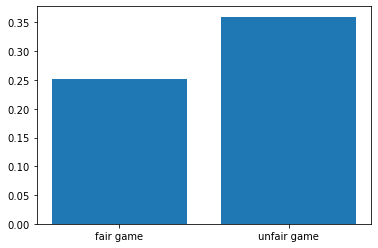

In [99]:
import matplotlib.pyplot as plt

height = [f_freq, uf_freq]
bars = ('fair game', 'unfair game')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

## Scenario 2

In [100]:
face_array = np.array([1,2,3,4,5,6])
fair = Die(face_array)
unfair1 = Die(face_array)
unfair1.change_weight(6,5)
unfair2 = Die(face_array)
unfair2.change_weight(1,5)

In [ ]:
# Play a game of 10000 rolls with 5 fair dice
fairgame=Game([fair,fair,fair,fair,fair])
fairgame.play(10000)
f = Analyzer(fairgame)
f_freq = f.jackpot()/10000

#Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.
unfairgame=Game([unfair1,unfair1,unfair2,fair,fair])
unfairgame.play(10000)
uf = Analyzer(unfairgame)
uf_freq = uf.jackpot()/10000


In [ ]:
import matplotlib.pyplot as plt

height = [f_freq, uf_freq]
bars = ('fair game', 'unfair game')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

## Scenario 3

In [ ]:
# Code blocks with output

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [ ]:
!ls -lRF -o

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [ ]:
# Installation commands